In [30]:
import pandas as pd
import sklearn
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df=pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [33]:
df.shape

(7043, 21)

In [34]:
df.size

147903

In [35]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df['TotalCharges'].dtype

dtype('O')

In [41]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')


In [42]:
df['TotalCharges'].dtype

dtype('float64')

In [43]:
categorical_features={
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MulitpleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
}
numerical_features=["tenure","MonthlyCharges","TotalCharges"]
target="Churn"

In [44]:
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [45]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [46]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

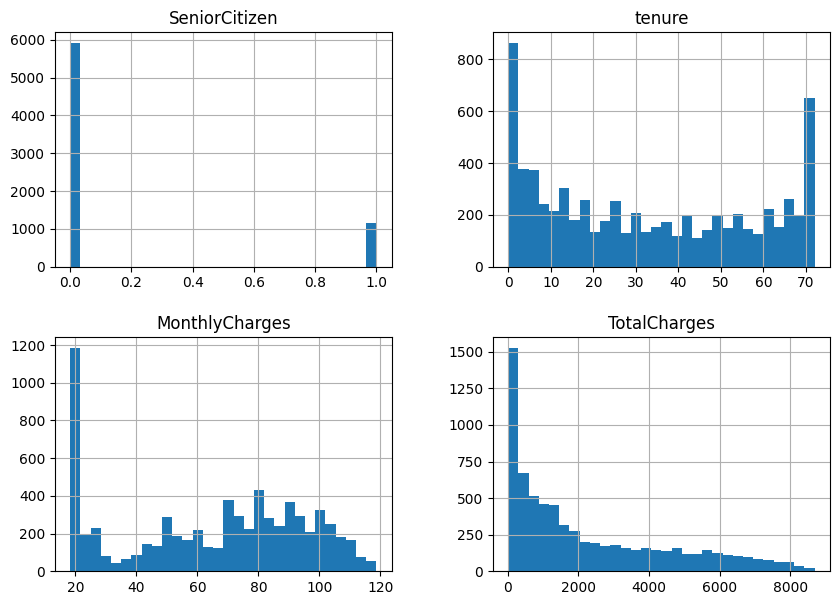

In [47]:
# Feature distribution
numerical_features = df.select_dtypes(include='number').columns
df[numerical_features].hist(bins=30, figsize=(10, 7))


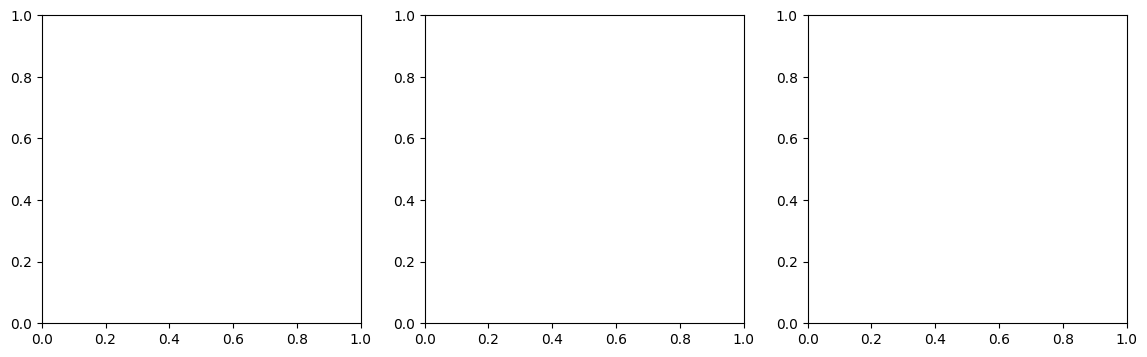

In [48]:
fig,ax=plt.subplots(1,3,figsize=(14,4))

C:\Users\DELL E5490\AppData\Local\Temp\ipykernel_14804\696897933.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df['Churn'] == 'No'][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)


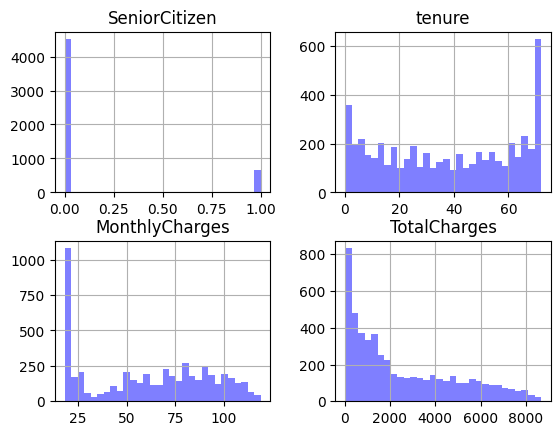

In [49]:
import matplotlib.pyplot as plt

# Assuming you want to create a new subplot
fig, ax = plt.subplots()

# Filtering DataFrame and plotting histograms
df[df['Churn'] == 'No'][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)

# Show the plot
plt.show()


In [50]:
df[df['Churn'] == 'Yes'][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)


C:\Users\DELL E5490\AppData\Local\Temp\ipykernel_14804\2888554884.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df['Churn'] == 'Yes'][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.drop(['customerID'],axis=1,inplace=True)

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
x=df.iloc[:,0:21]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [55]:
#df1 = pd.get_dummies(data=df, columns=['gender','Partner','Dependents',
 #   'PhoneService','MultipleLines','InternetService','OnlineSecurity',
  #  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
   # 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first=True)
#df1.head()
import pandas as pd

# Assuming df is your original DataFrame
df1 = pd.get_dummies(data=df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies', 'Contract',
                                       'PaperlessBilling', 'PaymentMethod', 'Churn'],
                     drop_first=True)

# Manually convert binary columns to 0 and 1
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService']
#df1[binary_columns] = df1[binary_columns].astype(int)

df1.head()




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,Female,0,Yes,No,1,No,29.85,29.85,True,False,...,False,False,False,False,False,True,False,True,False,False
1,Male,0,No,No,34,Yes,56.95,1889.50,False,False,...,False,False,False,True,False,False,False,False,True,False
2,Male,0,No,No,2,Yes,53.85,108.15,False,False,...,False,False,False,False,False,True,False,False,True,True
3,Male,0,No,No,45,No,42.30,1840.75,True,False,...,False,False,False,True,False,False,False,False,False,False
4,Female,0,No,No,2,Yes,70.70,151.65,False,False,...,False,False,False,False,False,True,False,True,False,True


In [56]:
import pandas as pd

# Assuming df is your original DataFrame
df1['MultipleLines_No phone service'] = df1['MultipleLines_No phone service'].replace({True: 1, False: 0})
df1['MultipleLines_Yes'] = df1['MultipleLines_Yes'].replace({True: 1, False: 0})


df1['gender'] = df1['gender'].replace({'Male': 1, 'Female': 0})

# Repeat the above line for other relevant columns

# For columns with 'Yes' and 'No'
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling_Yes', 'Churn_Yes']
df1[yes_no_columns] = df1[yes_no_columns].replace({'Yes': 1, 'No': 0})


true_false_columns = ['StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year',
                      'Contract_Two year'	,'PaperlessBilling_Yes',	'PaymentMethod_Credit card (automatic)',	
                      'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check',	'Churn_Yes']
df1[true_false_columns] = df1[true_false_columns].replace({True: 1, False: 0})

# Display the modified DataFrame
print(df1.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MonthlyCharges  TotalCharges  MultipleLines_No phone service  \
0           29.85         29.85                               1   
1           56.95       1889.50                               0   
2           53.85        108.15                               0   
3           42.30       1840.75                               1   
4           70.70        151.65                               0   

   MultipleLines_Yes  ...  StreamingTV_Yes  \
0                  0  ...                0   
1                  0  ...                0   
2                  0  ...       

In [57]:
df1.head()
#df1.columns

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,1,0,29.85,29.85,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,56.95,1889.50,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,53.85,108.15,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,45,0,42.30,1840.75,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,2,1,70.70,151.65,0,0,...,0,0,0,0,0,1,0,1,0,1


In [58]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes']]


KeyError: "['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes'] not in index"

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,1,0,29.85,29.85,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,56.95,1889.50,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,53.85,108.15,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,45,0,42.30,1840.75,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,2,1,70.70,151.65,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df1.shape

(7043, 31)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(df1.drop(['Churn_Yes'],axis=1))
scaled_features=scaler.transform(df1.drop(['Churn_Yes'],axis=1))
scaled_features

array([[-1.00955867, -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.99053183,  2.27315869,  1.03453023, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [ ]:
from sklearn.model_selection import train_test_split
x=scaled_features
y=df1['Churn_Yes']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=44)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming X_train is your feature matrix
# Using SimpleImputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_imputed, Y_train)

# Continue with the rest of your code (e.g., testing the model on the test set)


LogisticRegression()

In [ ]:
X_test_imputed=imputer.fit_transform(X_test)
y_pred=model.predict(X_test_imputed)

In [ ]:
accuracy_score(Y_test,y_pred)

0.8002839564600095

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[1397,  160],
       [ 262,  294]], dtype=int64)

In [ ]:
model.score(X_train_imputed,Y_train)

0.8062880324543611

In [ ]:
classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87      1557\n           1       0.65      0.53      0.58       556\n\n    accuracy                           0.80      2113\n   macro avg       0.74      0.71      0.73      2113\nweighted avg       0.79      0.80      0.79      2113\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X_train and Y_train are your training data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=44)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed=imputer.fit_transform(X_test)
# Initializing and training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, Y_train)

# Predicting on the test set
Y_pred = rf_model.predict(X_test_imputed)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7785139611926172
Confusion Matrix:
[[1392  165]
 [ 303  253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1557
           1       0.61      0.46      0.52       556

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113

